<a href="https://colab.research.google.com/github/Prithivi07/ml/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science and Business Analytics

# Task 1

## N PRITHIVI RAJAN

# Importing required libraries

In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-dark-palette','dark_background'])
import warnings
warnings.filterwarnings(action = 'ignore')

# Importing the dataset

In [2]:
data1 = pd.read_csv("http://bit.ly/w-data")

data1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
y = data1['Scores'].values
x = data1['Hours'].values
x.shape,y.shape

((25,), (25,))

# Plotting of the dataset

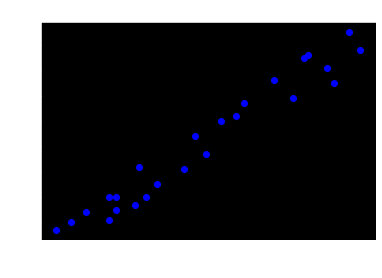

In [4]:
plt.figure()
plt.scatter(x,y,color = 'blue')
plt.xlabel('hours')
plt.ylabel('Score')
plt.title('Hour/score')
plt.show()

# Train and Test set partition

In [5]:
x = x.reshape(25,1)

from sklearn.model_selection import  train_test_split as tts
x_train , x_test , y_train , y_test = tts( x , y , test_size = 0.3 , random_state = 101)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17, 1), (8, 1), (17,), (8,))

# Fitting the model to the dataset

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Plotting the values of prediction

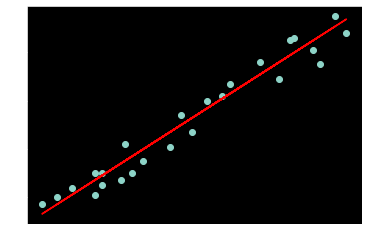

In [7]:
pred = x*lr.coef_ + lr.intercept_
plt.scatter(x, y)
plt.plot(x,pred,color = 'red');
plt.show()

# Predicting for Test set and ploting the graph

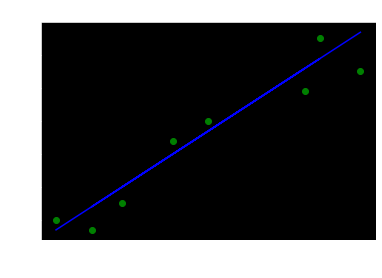

In [8]:
y_pred = lr.predict(x_test)

plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,y_pred, color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

In [9]:
test = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
test

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


# Predicting the score

In [10]:
a = np.array(9.25)

a= a.reshape(-1,1)

pred = lr.predict(a)
print(pred)

[94.29276126]


# Measuring Error in Model

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.864954643694254


In [12]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.8999124290533056
